<a href="https://colab.research.google.com/github/fnsalamaa/FINA-SALAMA-PCVK/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**✩˚｡⋆ WEEK 12 PCVK ✩˚｡⋆**

### Name : Fina Salama Qowlam Hareny

#### No    : 08 / 2141720164

####Class : TI-3I

----
##**⋰˚☆ ENGLISH MODULE 12 ⋰˚☆**
###**Feature Matching, Face Detection, Face Tracking**


In [14]:
from google.colab import drive

#akses google drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [17]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

1. Perform Face Detection for other image objects available at (/ images / facedet) as
shown in the following example.

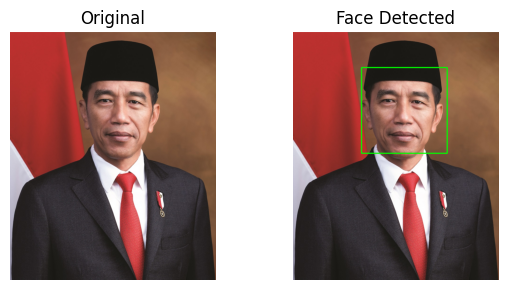

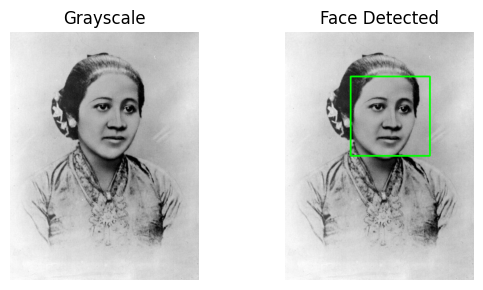

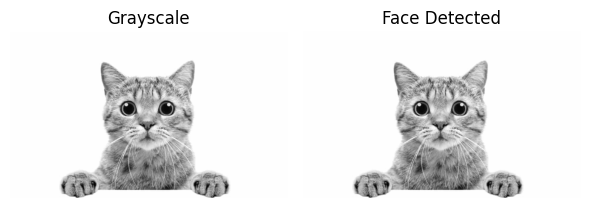

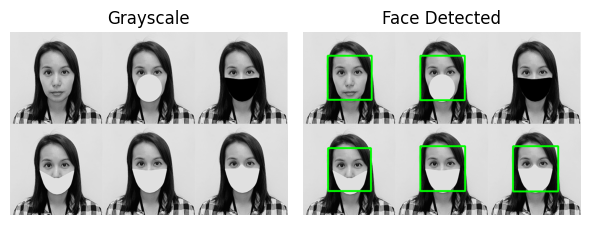

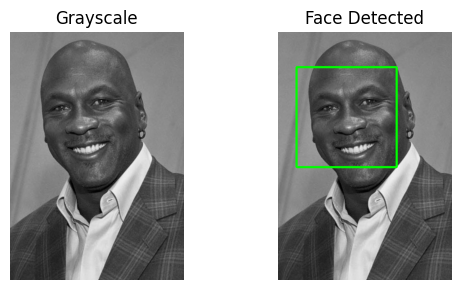

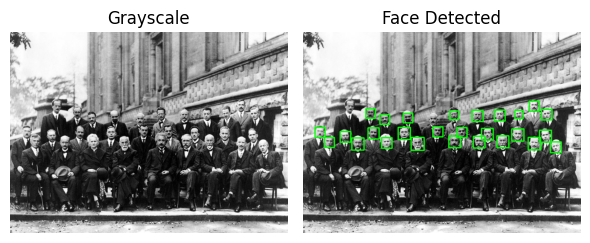

In [18]:
# Load the face cascade classifier
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml')

# Path to the folder containing the images
folder_path = '/content/drive/MyDrive/PCVK/facedet'

# List of image filenames you want to display
image_filenames = ['jokowi.jpg', 'kartini.jpg', 'kucing.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']

# Iterate over the specified image filenames
for filename in image_filenames:
    # Construct the full path to the image
    image_path = os.path.join(folder_path, filename)

    # Read the image in grayscale for non-'jokowi.jpg' images
    if 'jokowi.jpg' != filename:
        image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    else:
        # Read the original image in color for 'jokowi.jpg'
        image = cv.imread(image_path)

    # Convert the image to RGB for displaying with Matplotlib
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Detect faces in the image
    roi_wajah = cascade_wajah.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5)

    # Create a subplot to display original and processed images
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))

    # Display the original image
    axes[0].imshow(image_rgb)
    axes[0].set_title('Original' if 'jokowi.jpg' == filename else 'Grayscale')
    axes[0].axis('off')

    # Draw rectangles around the detected faces (green color)
    image_with_rect = image_rgb.copy()
    for (x, y, w, h) in roi_wajah:
        cv.rectangle(image_with_rect, (x, y), (x+w, y+h), (0, 255, 0), 3)

    # Display the processed image with the detected faces
    axes[1].imshow(image_with_rect)
    axes[1].set_title('Face Detected')
    axes[1].axis('off')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

Pay attention to the face detection results above. Overall, face detection can be done
well, even for images in the form of non-photo images, masked faces, or small faces
(solvay).

2. In Problem No.2. cat faces cannot be detected properly. Detect the cat's face until a rectangle appears on the face. For instructions on this problem, pay attention to the pretrained features that OpenCV has provided. Use the existing xml if one is provided. If you don't have it, try searching by searching through search engines.

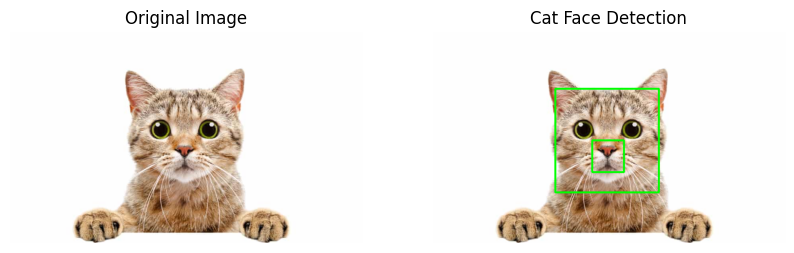

In [19]:
# Load the cat image
kucing = cv.imread('/content/drive/MyDrive/PCVK/facedet/kucing.jpg')

# Create a copy for face detection
kucing_face_detected = kucing.copy()

# Your cat face cascade for detection
cascade_kucing = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalcatface.xml")

# Detect faces in the 'kucing' image
roi_wajah_kucing = cascade_kucing.detectMultiScale(kucing_face_detected)

# Draw rectangles around the detected cat faces
for (x, y, w, h) in roi_wajah_kucing:
    cv.rectangle(kucing_face_detected, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Display the original 'kucing' image and image with cat face detection
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv.cvtColor(kucing, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(kucing_face_detected, cv.COLOR_BGR2RGB))
ax[1].set_title('Cat Face Detection')
ax[1].axis('off')

plt.show()

3. Also try it for an eyes detection.

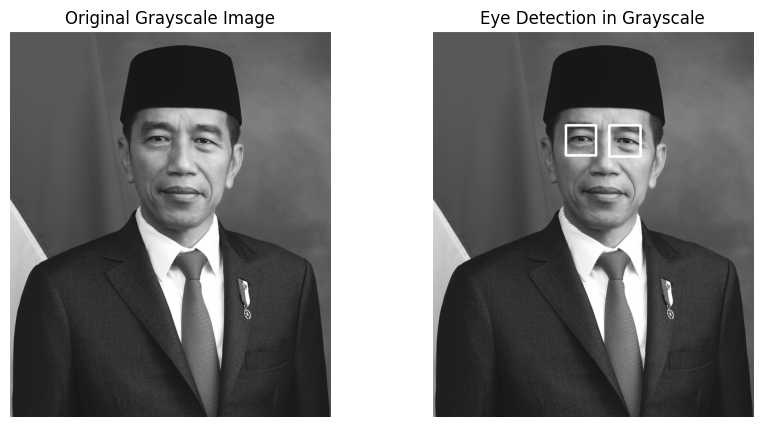

In [21]:
# Load the image
jokowi = cv.imread('/content/drive/MyDrive/PCVK/facedet/jokowi.jpg')
jokowi_face_detected = jokowi.copy()

# Detect faces
roi_wajah = cascade_wajah.detectMultiScale(jokowi_face_detected)

# Your eye cascade for eye detection
cascade_mata = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_eye.xml")

# For each face, detect eyes and draw rectangles around the eyes
for (x, y, w, h) in roi_wajah:
    face_roi = jokowi_face_detected[y:y+h, x:x+w]  # Extract the face region
    eyes = cascade_mata.detectMultiScale(face_roi)

    for (ex, ey, ew, eh) in eyes:
        cv.rectangle(face_roi, (ex, ey), (ex+ew, ey+eh), (255, 255, 255), 5)

# Convert the 'jokowi_face_detected' image to grayscale
jokowi_face_detected_gray = cv.cvtColor(jokowi_face_detected, cv.COLOR_BGR2GRAY)

# Display the original 'jokowi' image in grayscale and the 'jokowi_face_detected' image with eye detection in grayscale
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(cv.cvtColor(jokowi, cv.COLOR_BGR2GRAY), cmap='gray')
ax[0].set_title('Original Grayscale Image')
ax[0].axis('off')

ax[1].imshow(jokowi_face_detected_gray, cmap='gray')
ax[1].set_title('Eye Detection in Grayscale')
ax[1].axis('off')

plt.show()

4. Implement Face Tracking using Google Colab. Instructions, complete tutorials on camera
access and FaceDetection on google colab can be seen at the following
link: https://www.youtube.com/watch?v=YjWh7QvVH60


In [22]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [23]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [24]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [27]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
# get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  for (x,y,w,h) in faces:
      img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


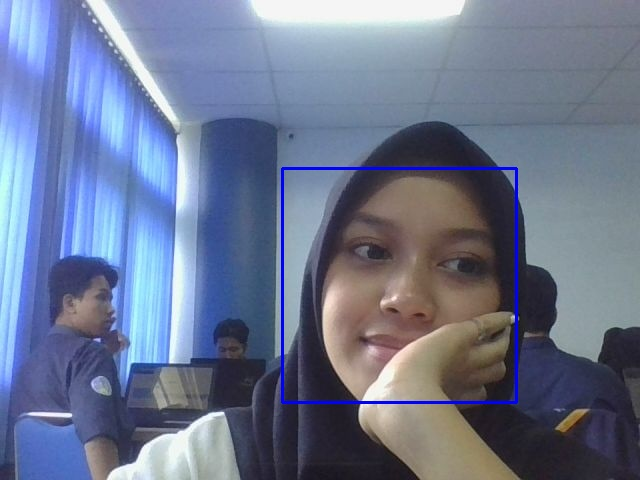

In [28]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

5. Blur the detected part of the face. Here's an example of the output. Hint: you can use
cv.medianBlur to give a blur effect.

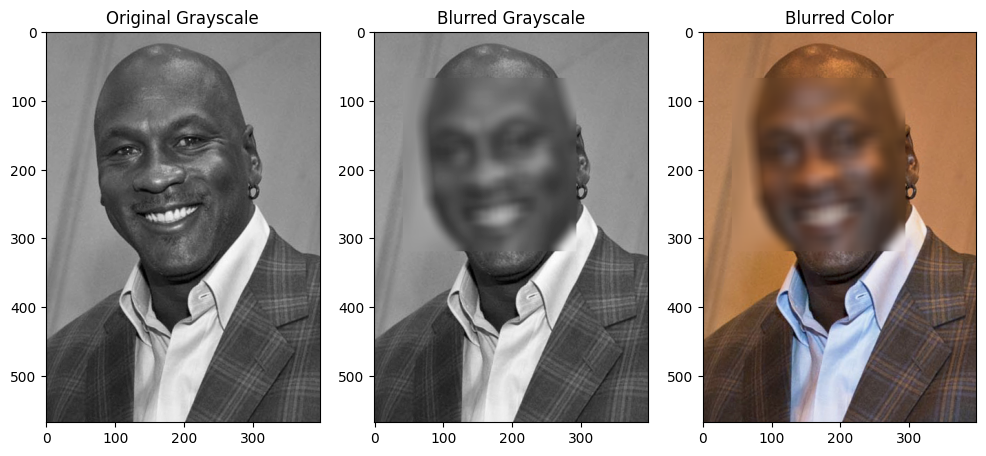

In [74]:
# Load the face cascade classifier
haar_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Load the image
jordan_img = cv2.imread('/content/drive/MyDrive/PCVK/facedet/mjordan.jpg')

# Create a copy of the input image
blurred = jordan_img.copy()

# Detect faces in the image
faces_rects = haar_cascade.detectMultiScale(jordan_img, scaleFactor=1.6, minNeighbors=5)

# Blur detected faces
for (x, y, w, h) in faces_rects:
    # Crop the face region
    roi = blurred[y:y+h, x:x+w]

    # Apply Gaussian blur to the face region
    roi = cv2.GaussianBlur(roi, (21, 21), 30)
    blurred[y:y+h, x:x+w] = roi

# Convert the original and blurred images to grayscale
gray_jordan_img = cv2.cvtColor(jordan_img, cv2.COLOR_BGR2GRAY)
gray_blurred = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Display the original and blurred grayscale images
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(gray_jordan_img, cmap='gray'), plt.title('Original Grayscale')
plt.subplot(132), plt.imshow(gray_blurred, cmap='gray'), plt.title('Blurred Grayscale')
plt.subplot(133), plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB), cmap='gray'), plt.title('Blurred Color')

plt.show()


----
##**⋰˚☆ INDO MODULE 12 ⋰˚☆**
###**Feature Matching, Face Detection, Face Tracking**


1. Lakukan segmentasi karakter pada KTP seperti gambar berikut

(<Axes: title={'center': 'Contour Detection'}>,
 Text(0.5, 1.0, 'Contour Detection'))

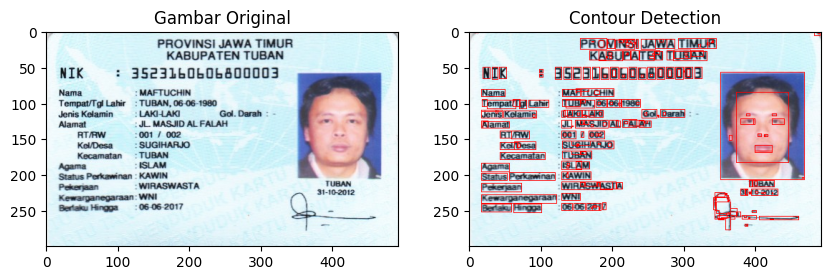

In [57]:
# Load Data
img = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp3.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
blurred = cv2.GaussianBlur(gray, (3, 3), 1)
ret, thresh = cv2.threshold(blurred.copy(), 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Contour extraction
detected = img.copy()
edged = cv2.Canny(thresh, 16, 16)
contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(detected, (x, y), (x + w, y + h), (255, 0, 0), 1)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Gambar Original')
plt.subplot(122), plt.imshow(detected, cmap='gray'), plt.title('Contour Detection')

2. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

(<Axes: title={'center': 'Cropped Image'}>,
 Text(0.5, 1.0, 'Cropped Image'))

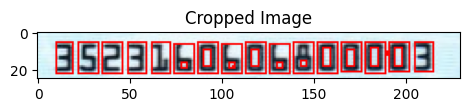

In [72]:
# Cropping coordinates
ktp_crop = detected[45:70,110:340].copy()
plt.figure(figsize=(12, 8))

# Displays the cropped image
plt.subplot(122), plt.imshow(ktp_crop, cmap='gray'), plt.title('Cropped Image')

3. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training

In [76]:
import numpy as np
import pickle
import random
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import load_model

In [77]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
width, height = 28, 28

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Combine features and labels into a list
training_data = list(zip(train_images, train_labels))

# Shuffle the training data
random.shuffle(training_data)

# Separate features and labels
X, Y = zip(*training_data)

# Convert to NumPy arrays
X = np.array(X)
Y = np.array(Y)

# Tulis ke file pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

4. Training Data

In [82]:
# Load data from pickle files
with open("X.pickle", "rb") as file:
    X = pickle.load(file)

with open("Y.pickle", "rb") as file:
    Y = pickle.load(file)

# Create a simple convolutional neural network (CNN) model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, Y, epochs=5, validation_split=0.2)

# Save the trained model
model.save("mnist_model.h5")

Epoch 1/5
1500/1500 [==============================] - 29s 19ms/step - loss: 0.2336 - accuracy: 0.9343 - val_loss: 0.1170 - val_accuracy: 0.9659
Epoch 2/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0866 - accuracy: 0.9753 - val_loss: 0.0852 - val_accuracy: 0.9756
Epoch 3/5
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0629 - accuracy: 0.9818 - val_loss: 0.0776 - val_accuracy: 0.9767
Epoch 4/5
1500/1500 [==============================] - 23s 15ms/step - loss: 0.0514 - accuracy: 0.9846 - val_loss: 0.0760 - val_accuracy: 0.9773
Epoch 5/5
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0428 - accuracy: 0.9876 - val_loss: 0.0775 - val_accuracy: 0.9768


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5. Testing Data

In [85]:
# Load and preprocess the MNIST test dataset
(_, _), (test_images, test_labels) = mnist.load_data()
width, height = 28, 28

test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
test_labels = to_categorical(test_labels)

# Combine features and labels into a list
testing_data = list(zip(test_images, test_labels))

# Shuffle the testing data
random.shuffle(testing_data)

# Separate features and labels
X_test, Y_test = zip(*testing_data)

# Convert to NumPy arrays
X_test = np.array(X_test)
Y_test = np.array(Y_test)

# Tulis ke file pickle
pickle_out = open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("Y_test.pickle", "wb")
pickle.dump(Y_test, pickle_out)
pickle_out.close()

In [86]:
# Load the trained model
model = load_model("mnist_model.h5")

# Load the testing data from pickle files
with open("X_test.pickle", "rb") as file:
    X_test = pickle.load(file)

with open("Y_test.pickle", "rb") as file:
    Y_test = pickle.load(file)

# Evaluate the model on the testing data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.0618 - accuracy: 0.9798
Test Accuracy: 0.9797999858856201


----
##**⋰˚☆ TASK ⋰˚☆**
###**Silakan melakukan pengenalan NIK pada e-KTP yang terdapat pada tugas modul 11**


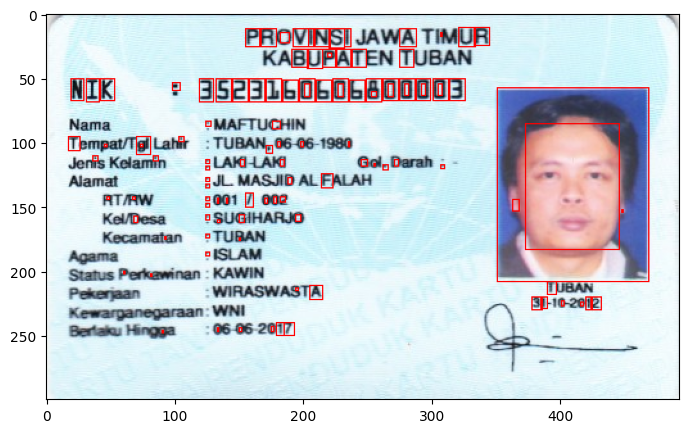

In [89]:
# Load Image
img = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp3.png')

# Blur the Image
blurred = cv.GaussianBlur(img, (5, 5), 0.5)

# Convert to Grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Thresholding
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Erosion
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Contour Extraction
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Bounding Rectangle and Filtering
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <= 1:
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
        cv.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Display Result
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()


(<Axes: title={'center': 'Cropped Image'}>,
 Text(0.5, 1.0, 'Cropped Image'))

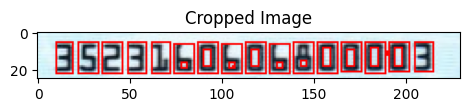

In [90]:
# Cropping coordinates
ktp_crop = detected[45:70,110:340].copy()
plt.figure(figsize=(12, 8))

# Displays the cropped image
plt.subplot(122), plt.imshow(ktp_crop, cmap='gray'), plt.title('Cropped Image')